In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

TAR_PATH = "/home/yifan/Exp/Mutation/drop_channel/0.4/experiment3"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis2'

DEVICE='cpu'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
tar_datainit = DataInit(TAR_PATH,TAR_PATH,TAR_EPOCH,DEVICE)
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)

ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVis_Visualizer.visualizer import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7579.04it/s]


NET resnet18_with_mutation
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8649.98it/s]


absolute alignment indicates number: 140 label diff indicates number: 98 confidence diff indicates number: 87 high distance number: 30


In [2]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8073.92it/s]

NET resnet18_with_mutation


Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8500.41it/s]


In [12]:
####### add boundary sample to train
import os
autoencoder, ref_features, tar_features = AutoEncoder_Generator.encoder_trainer_with_border(os.path.join(TAR_PATH, "pre_autoencoder_withborder.npy"),os.path.join(TAR_PATH, "pre_autoencoder_withborder.npy"),0.01,500,5,1e-3)

loading boundary
len(input) 52000


100%|██████████| 1/1 [00:00<00:00, 4888.47it/s]


Epoch [1/5], Loss: 0.0244, Loss decoder: 0.0015,Loss encoder: 0.0023,pred_loss:0.8493796586990356,cka_loss0.012166709639132023


100%|██████████| 1/1 [00:00<00:00, 3287.07it/s]


Epoch [2/5], Loss: 0.0237, Loss decoder: 0.0015,Loss encoder: 0.0023,pred_loss:0.8501157760620117,cka_loss0.011371640488505363


100%|██████████| 1/1 [00:00<00:00, 5236.33it/s]


Epoch [3/5], Loss: 0.0233, Loss decoder: 0.0015,Loss encoder: 0.0023,pred_loss:0.8379096388816833,cka_loss0.011140555143356323


100%|██████████| 1/1 [00:00<00:00, 6626.07it/s]


Epoch [4/5], Loss: 0.0227, Loss decoder: 0.0015,Loss encoder: 0.0023,pred_loss:0.7002931833267212,cka_loss0.011885556392371655


100%|██████████| 1/1 [00:00<00:00, 4882.78it/s]

Epoch [5/5], Loss: 0.0241, Loss decoder: 0.0015,Loss encoder: 0.0023,pred_loss:0.8567224740982056,cka_loss0.011758481152355671


In [3]:
import os
if os.path.exists(os.path.join(TAR_PATH, "pre_autoencoder.npy")):
    print("continue")
    autoencoder = AutoEncoder_Generator.encoder_trainer_with_pre_trained(os.path.join(TAR_PATH, "pre_autoencoder.npy"), os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=1,learning_rate=1e-4)
else:
    print("new one")
    autoencoder = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=10)

continue
NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 5381.20it/s]


NET resnet18_with_mutation
Finish initialization...


100%|██████████| 3/3 [00:00<00:00, 7354.13it/s]

Epoch [1/1], Loss: 2.0866, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 111.21694946289062,pred_loss:0.8499990701675415,loss_contrastive11.032609634399414,cka_loss0.01244419813156128


In [4]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
# eval.eval_boundary_nn_autoencoder(tar_border_centers, autoencoder)

In [5]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Fri May 12 00:08:52 2023 Building RP forest with 16 trees
Fri May 12 00:08:52 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	Stopping threshold met -- exiting after 5 iterations
Fri May 12 00:09:10 2023 Building RP forest with 16 trees
Fri May 12 00:09:10 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.25/15 in epoch 200


1.25386

In [6]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8136.82it/s]

#train# autoencoder PPR: 0.93 in epoch 200


0.93164

In [7]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
encoded_Y = autoencoder.encoder(torch.Tensor(tar_train_data))
encoded_Y = encoded_Y.detach().numpy()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(tar_train_data[indicates],encoded_Y[indicates]))

CKA between absolute alignmnet subset is: 0.9917000325413053


In [13]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8486.30it/s]

refere  predction preserving:49140/50000 0.98
target  predction preserving:46306/50000 0.93
ref&tar pred_same preserving:45740/49902 0.92
ref&tar pred_diff preserving:58/98 0.59


In [14]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 7941.65it/s]


long distance move subet number is 2716, short distance move set number is 715


100%|██████████| 250/250 [00:00<00:00, 8280.89it/s]


all reference distance preserving 49919/50000
all target distance preserving 49692/50000
short distance move direction preserving 697/715
long distance move direction preserving 2694/2716


In [ ]:
DEVICE="cuda:1"
####### generate boundary ponits for tar and ref respectively
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,REF_PATH,TAR_PATH,TAR_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_boundary,tar_boundary = BoundaryGen.get_boundary_point(DEVICE,num_adv_eg=1000)
import torch
###### get border sample features
import torch.nn as nn

ref_feature_model = ref_model.to(DEVICE)
ref_feature_model = nn.Sequential(*list(ref_feature_model.children())[:-1])
with torch.no_grad():
    features = ref_feature_model(ref_boundary)
    ref_features = features.view(ref_boundary.shape[0], -1)

###### get border sample features
tar_feature_model = tar_model.to(DEVICE)
tar_feature_model = nn.Sequential(*list(tar_feature_model.children())[:-1])
with torch.no_grad():
    tar_features = tar_feature_model(tar_boundary)
    tar_features = tar_features.view(tar_boundary.shape[0], -1)

In [63]:
eval.eval_boundary_nn_ref_in_ref(ref_features.cpu().numpy())

#train# boundary preserving: 2.10/15 in epoch 200


2.10386

In [64]:
eval.eval_boundary_nn_autoencoder(tar_features.cpu().numpy(),autoencoder,15)

#train# boundary preserving: 2.10/15 in epoch 200


2.09654

In [10]:
ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
ref_features = np.load(ref_border_centers_loc).squeeze()

In [11]:
tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
tar_features = np.load(tar_border_centers_loc).squeeze()

In [12]:
eval.eval_boundary_nn_ref_in_ref(ref_features)

#train# boundary preserving: 1.43/15 in epoch 200


1.42844

In [10]:
eval.eval_boundary_nn_autoencoder(tar_features,autoencoder,15)

#train# boundary preserving: 1.58/15 in epoch 200


1.57568

In [68]:
tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
tar_b_features = np.load(tar_border_centers_loc).squeeze()

In [33]:
new_Ref = np.concatenate((ref_b_features, ref_features.cpu().numpy()), axis=0, out=None)

In [38]:
new_Tar = np.concatenate((tar_b_features, tar_features.cpu().numpy()), axis=0, out=None)

In [35]:
eval.eval_boundary_nn_ref_in_ref(new_Ref)

#train# boundary preserving: 1.58/15 in epoch 200


1.58108

In [39]:
eval.eval_boundary_nn_autoencoder(new_Tar,autoencoder,15)

#train# boundary preserving: 1.39/15 in epoch 200


1.38652

In [36]:
new_Ref.shape

(2000, 512)

In [11]:
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_features)
np.save(location_T, tar_features)

In [15]:
def eval_boundary_align_sensitivity(autoencoder, tar_b_features, ref_b_features):
        ############## init ###################
        #init target
        print("123")
        tar_b_pred = tar_provider.get_pred(TAR_EPOCH, tar_b_features)
        tar_b_pred = tar_b_pred + 1e-8
        tar_sort_preds = np.sort(tar_b_pred, axis=1)
        tar_diff = (tar_sort_preds[:, -1] - tar_sort_preds[:, -2]) / (tar_sort_preds[:, -1] - tar_sort_preds[:, 0])
        tar_border = np.zeros(len(tar_diff), dtype=np.uint8) + 0.05
        tar_border[tar_diff < 0.15] = 1

        #init reference
        ref_b_pred = ref_provider.get_pred(REF_EPOCH, ref_b_features)
        ref_b_pred = ref_b_pred + 1e-8
        ref_sort_preds = np.sort(ref_b_pred, axis=1)
        ref_diff = (ref_sort_preds[:, -1] - ref_sort_preds[:, -2]) / (ref_sort_preds[:, -1] - ref_sort_preds[:, 0])
        ref_border = np.zeros(len(ref_diff), dtype=np.uint8) + 0.05
        ref_border[ref_diff < 0.15] = 1
        
        ##### get all boundary list
        all_boundary_list = []
        
        for i in range(len(ref_border)):
            if ref_border[i] == 1 and tar_border[i] == 1:
                all_boundary_list.append(i)
        print(len(all_boundary_list))
        #### get ref low dimensional border
        ref_b_embedding = projector.batch_project(REF_EPOCH, ref_b_features)
        ref_b_inv = projector.batch_inverse(REF_EPOCH,ref_b_embedding)
        ref_b_pred_l = ref_provider.get_pred(REF_EPOCH, ref_b_inv)
        ref_b_pred_l = ref_b_pred_l  + 1e-8
        ref_sort_preds_l  = np.sort(ref_b_pred_l , axis=1)
        ref_diff_l  = (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, -2]) / (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, 0])
        ref_border_l = np.zeros(len(ref_diff_l), dtype=np.uint8) + 0.05
        ref_border_l[ref_diff_l < 0.15] = 1
        
        #### get target low dimensional border
        tar_b_embedding = projector.batch_project(REF_EPOCH, autoencoder.encoder(torch.Tensor(ref_b_features)).detach().numpy())
        tar_b_inv = projector.batch_inverse(REF_EPOCH,tar_b_embedding)
        tar_b_inv = autoencoder.decoder(torch.Tensor(tar_b_inv)).detach().numpy()
        tar_b_pred_l = tar_provider.get_pred(REF_EPOCH, tar_b_inv)
        tar_b_pred_l = tar_b_pred_l  + 1e-8
        tar_sort_preds_l  = np.sort(tar_b_pred_l , axis=1)
        tar_diff_l  = (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, -2]) / (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, 0])
        tar_border_l = np.zeros(len(tar_diff_l), dtype=np.uint8) + 0.05
        tar_border_l[tar_diff_l < 0.15] = 1

        all_boundary_list_l = []
       
        all_change = []
        all_change_l=[]
      
        for i in range(len(ref_border)):
            ##### low dimension all border
            if ref_border_l[i] == 1 and tar_border_l[i] == 1:
                all_boundary_list_l.append(i)
            if ref_border[i] != tar_border[i]:
                 all_change.append(i)
            if ref_border[i] != tar_border[i] and tar_border_l[i] == tar_border[i]:
                 all_change_l.append(i)
                 
                 
           


        print("boundary sample preserving{}/{}".format(len(all_boundary_list_l),len(all_boundary_list)))
        print("boundary change preserving{}/{}".format(len(all_change_l),len(all_change)))
       
eval_boundary_align_sensitivity(autoencoder,np.concatenate((tar_train_data,tar_features),axis=0), np.concatenate((ref_train_data,ref_features),axis=0))      

123


100%|██████████| 260/260 [00:00<00:00, 8235.62it/s]

2043



100%|██████████| 260/260 [00:00<00:00, 5954.99it/s]

boundary sample preserving535/2043
boundary change preserving723/1298


Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 5931.33it/s]


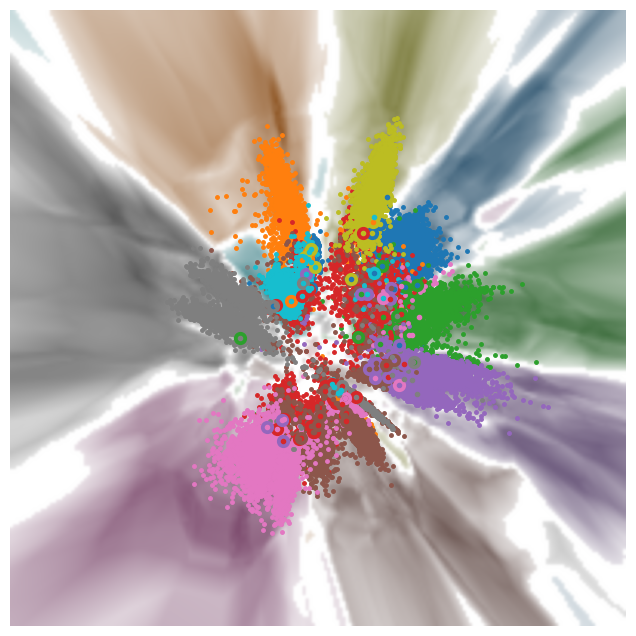

In [58]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

In [70]:
from AlignVis.AlignSimilarityScaler import AlignSimilarityScaler

AlignSimilarity_scaler = AlignSimilarityScaler(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8642.85it/s]


NET resnet18_with_mutation
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8661.48it/s]


In [71]:
sim_list_all = AlignSimilarity_scaler.get_jaccard_similarities(ref_train_data, tar_train_data, 10)

In [72]:
def normalize_distances(distances):
    d_max = torch.max(distances)
    return distances / d_max

def weighted_harmonic_mean(jaccard_similarities, normalized_distances, alpha=0.5):
    numerator = (1 + alpha) * jaccard_similarities * (1 - normalized_distances)
    denominator = alpha * (1 - normalized_distances) + jaccard_similarities
    return numerator / denominator

def evaluate_alignment_preserving(subset_distances, subset_jaccard_similarities, alpha=0.5):
    normalized_distances = normalize_distances(subset_distances)
    harmonic_means = weighted_harmonic_mean(subset_jaccard_similarities, normalized_distances, alpha)
    return torch.mean(harmonic_means)

In [73]:
# Transform Y into X's space
encoded_Y = autoencoder.encoder(Y)
c_y = encoded_Y.detach().numpy()
from sklearn.metrics import pairwise_distances
distances2 = pairwise_distances(ref_train_data, encoded_Y.detach().numpy())
print(len(ref_train_data),"all data samples distance" ,distances2.mean())

50000 all data samples distance 21.256021


In [85]:
val = distances2.mean() // 1.5

In [86]:
num=0
indices = [i for i, score in enumerate(sim_list_all) if score >0.990]
len(indices)
dis = []
for i in range(len(indices)):
    index = indices[i]
    # dis.append(distances2[index][index])
    if distances2[index][index] < val:
        num = num+1
        print("num",i,len(indices), num)


num 0 4950 1
num 1 4950 2
num 2 4950 3
num 3 4950 4
num 4 4950 5
num 5 4950 6
num 7 4950 7
num 8 4950 8
num 9 4950 9
num 10 4950 10
num 11 4950 11
num 12 4950 12
num 13 4950 13
num 14 4950 14
num 16 4950 15
num 17 4950 16
num 18 4950 17
num 19 4950 18
num 20 4950 19
num 21 4950 20
num 22 4950 21
num 23 4950 22
num 24 4950 23
num 25 4950 24
num 26 4950 25
num 27 4950 26
num 28 4950 27
num 29 4950 28
num 30 4950 29
num 31 4950 30
num 32 4950 31
num 33 4950 32
num 34 4950 33
num 35 4950 34
num 36 4950 35
num 37 4950 36
num 39 4950 37
num 40 4950 38
num 41 4950 39
num 42 4950 40
num 43 4950 41
num 44 4950 42
num 45 4950 43
num 46 4950 44
num 47 4950 45
num 48 4950 46
num 49 4950 47
num 51 4950 48
num 52 4950 49
num 53 4950 50
num 54 4950 51
num 55 4950 52
num 57 4950 53
num 59 4950 54
num 60 4950 55
num 61 4950 56
num 62 4950 57
num 64 4950 58
num 65 4950 59
num 66 4950 60
num 67 4950 61
num 68 4950 62
num 71 4950 63
num 72 4950 64
num 73 4950 65
num 74 4950 66
num 75 4950 67
num 76 4950 6

In [81]:
indices = [i for i, score in enumerate(sim_list_all) if score >0.990]
len(indices)

4950

In [87]:
print(num)

4671
